# Business Analytics & Insights
## E-commerce Supply Chain Performance Analysis

This notebook provides business insights and recommendations based on the data analysis and modeling results.

In [3]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from src.utils import load_data

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

## 1. Load Processed Data

In [4]:
# Load processed data and engineered features
features_df = pd.read_csv('../data/processed/master_features.csv')

# Convert datetime columns
datetime_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_timestamp', 'order_estimated_delivery_date']
for col in datetime_cols:
    if col in features_df.columns:
        features_df[col] = pd.to_datetime(features_df[col], errors='coerce')

print(f"Dataset Shape: {features_df.shape}")
features_df.head()

Dataset Shape: (89316, 46)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,purchase_year,purchase_month,purchase_day,...,uses_installments,customer_state,total_orders,total_spent,avg_order_value,customer_segment,avg_product_volume,avg_product_weight,avg_product_popularity,primary_category
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,2017,10,22,...,0,SP,1,223.51,223.51,one_time,3648.0,491.0,13.0,toys
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,2018,6,20,...,1,RJ,1,170.80,170.80,one_time,4284.0,440.0,3.0,watches_gifts
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,2018,2,16,...,1,SP,1,64.40,64.40,one_time,4096.0,2200.0,5.0,costruction_tools_garden
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,2018,8,18,...,1,MG,1,264.50,264.50,one_time,9792.0,1450.0,6.0,toys
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,2017,12,22,...,0,SP,1,779.90,779.90,one_time,816.0,300.0,13.0,toys


## 2. Temporal Analysis

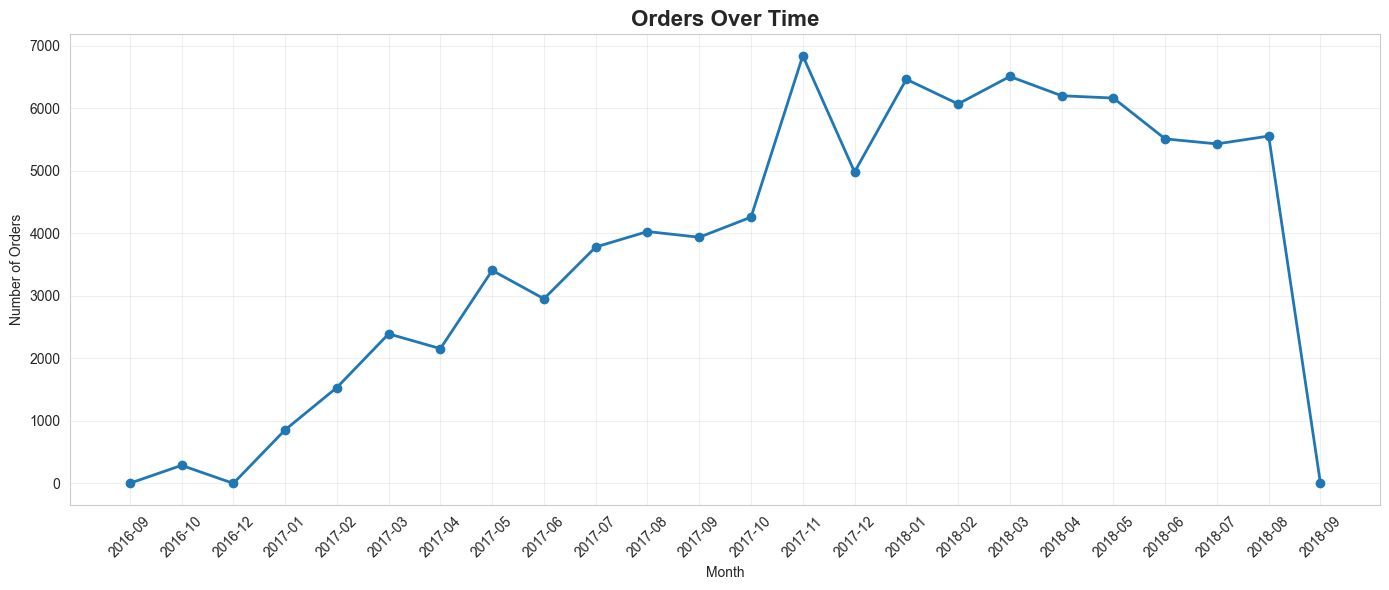

In [5]:
# Orders over time
if 'order_purchase_timestamp' in features_df.columns:
    features_df['month_year'] = features_df['order_purchase_timestamp'].dt.to_period('M')
    
    monthly_orders = features_df.groupby('month_year').size().reset_index(name='order_count')
    monthly_orders['month_year'] = monthly_orders['month_year'].astype(str)
    
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(monthly_orders['month_year'], monthly_orders['order_count'], marker='o', linewidth=2)
    ax.set_title('Orders Over Time', fontsize=16, fontweight='bold')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Orders')
    ax.grid(alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../results/figures/orders_over_time.png', dpi=300, bbox_inches='tight')
    plt.show()

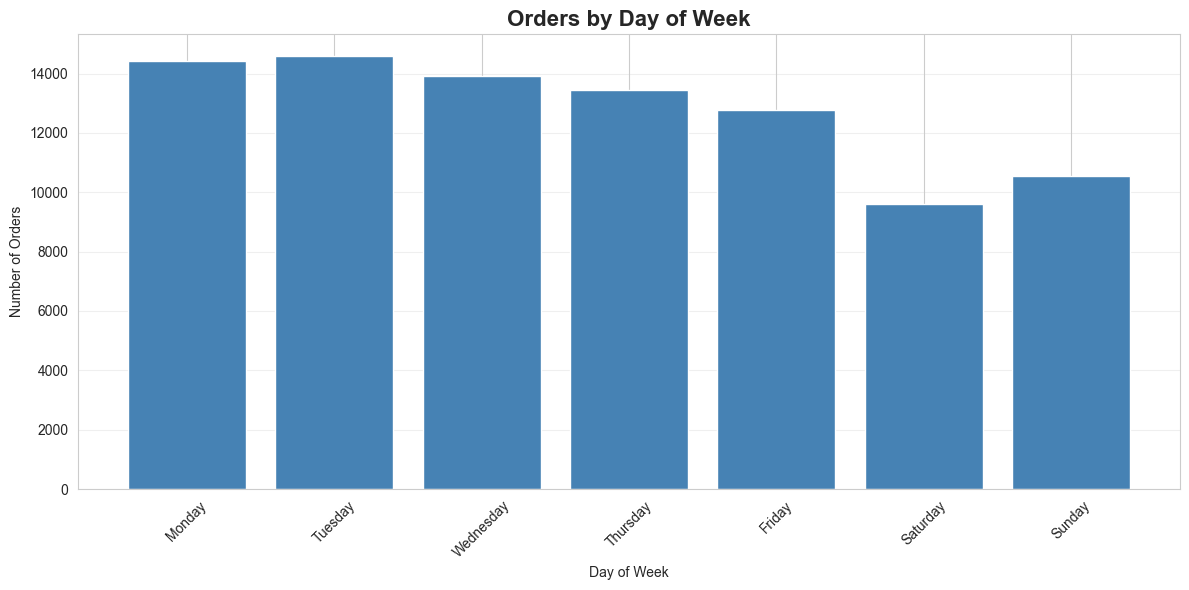


Orders by Day of Week:
  Monday: 14416
  Tuesday: 14592
  Wednesday: 13919
  Thursday: 13458
  Friday: 12781
  Saturday: 9600
  Sunday: 10550


In [6]:
# Day of week analysis
if 'purchase_dayofweek' in features_df.columns:
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_orders = features_df['purchase_dayofweek'].value_counts().sort_index()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(range(7), dow_orders.values, color='steelblue')
    ax.set_xticks(range(7))
    ax.set_xticklabels(day_names, rotation=45)
    ax.set_title('Orders by Day of Week', fontsize=16, fontweight='bold')
    ax.set_xlabel('Day of Week')
    ax.set_ylabel('Number of Orders')
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../results/figures/orders_by_day_of_week.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nOrders by Day of Week:")
    for day, count in zip(day_names, dow_orders.values):
        print(f"  {day}: {count}")

## 3. Delivery Performance Analysis

Delivery Time Statistics (days):
count    87427.000000
mean        12.003341
std          9.235907
min          0.000000
25%          6.290278
50%          9.823380
75%         15.006302
max        208.500972
Name: delivery_time_days, dtype: float64


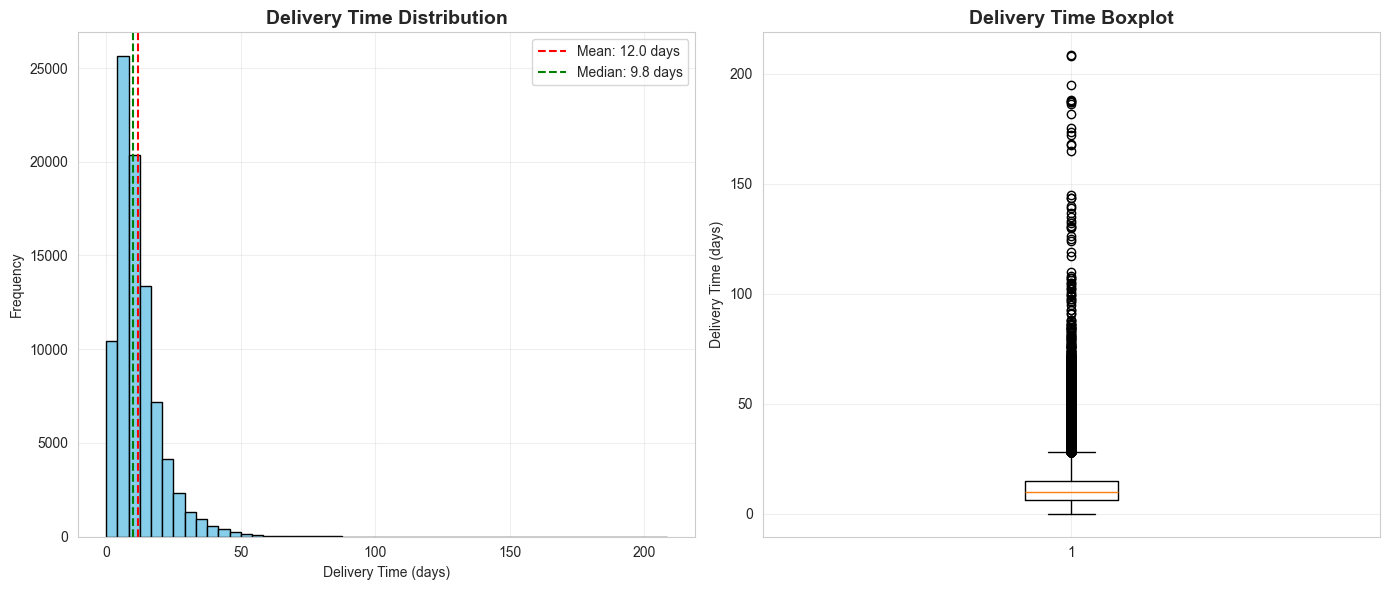

In [7]:
# Delivery time distribution
if 'delivery_time_days' in features_df.columns:
    delivery_stats = features_df['delivery_time_days'].describe()
    
    print("Delivery Time Statistics (days):")
    print(delivery_stats)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Histogram
    axes[0].hist(features_df['delivery_time_days'].dropna(), bins=50, edgecolor='black', color='skyblue')
    axes[0].set_title('Delivery Time Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Delivery Time (days)')
    axes[0].set_ylabel('Frequency')
    axes[0].axvline(delivery_stats['mean'], color='red', linestyle='--', label=f'Mean: {delivery_stats["mean"]:.1f} days')
    axes[0].axvline(delivery_stats['50%'], color='green', linestyle='--', label=f'Median: {delivery_stats["50%"]:.1f} days')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Boxplot
    axes[1].boxplot(features_df['delivery_time_days'].dropna(), vert=True)
    axes[1].set_title('Delivery Time Boxplot', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Delivery Time (days)')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../results/figures/delivery_time_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()


Delivery Performance:
  Delayed: 7.55%
  Early: 90.34%
  On Time (±1 day): 2.65%


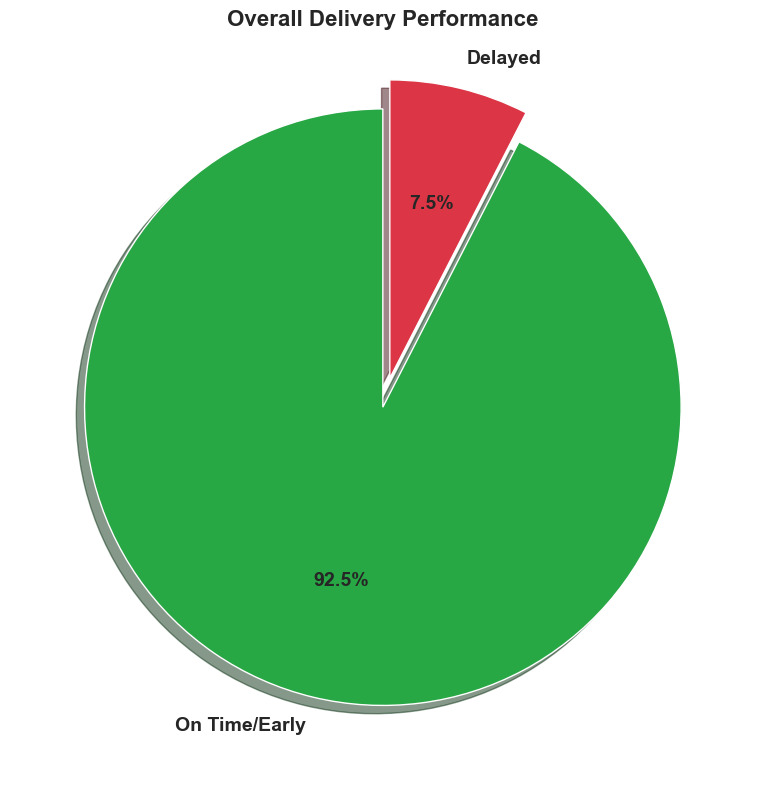

In [8]:
# Delivery delay analysis
if 'is_delayed' in features_df.columns:
    delay_rate = features_df['is_delayed'].mean() * 100
    early_rate = features_df.get('is_early', pd.Series([0])).mean() * 100
    on_time_rate = features_df.get('is_on_time', pd.Series([0])).mean() * 100
    
    print(f"\nDelivery Performance:")
    print(f"  Delayed: {delay_rate:.2f}%")
    print(f"  Early: {early_rate:.2f}%")
    print(f"  On Time (±1 day): {on_time_rate:.2f}%")
    
    # Pie chart
    fig, ax = plt.subplots(figsize=(10, 8))
    sizes = [100 - delay_rate, delay_rate]
    labels = ['On Time/Early', 'Delayed']
    colors = ['#28a745', '#dc3545']
    explode = (0, 0.1)
    
    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
           shadow=True, startangle=90, textprops={'fontsize': 14, 'fontweight': 'bold'})
    ax.set_title('Overall Delivery Performance', fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../results/figures/delivery_performance.png', dpi=300, bbox_inches='tight')
    plt.show()

## 4. Geographic Analysis

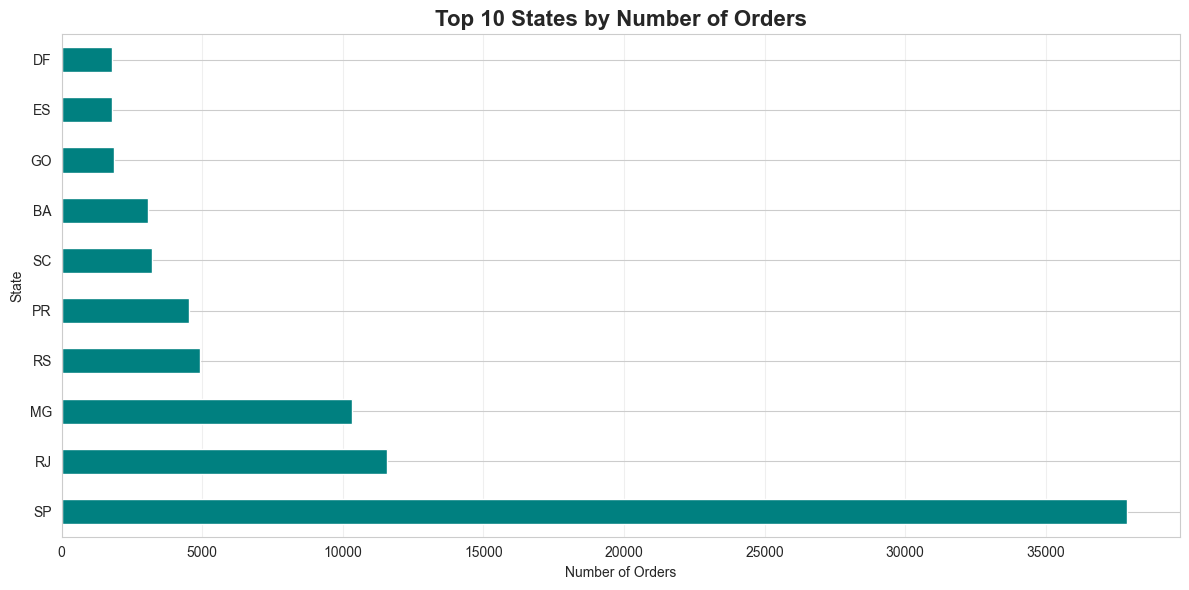


Top 10 States by Orders:
customer_state
SP    37879
RJ    11578
MG    10334
RS     4921
PR     4523
SC     3213
BA     3088
GO     1868
ES     1798
DF     1793
Name: count, dtype: int64


In [9]:
# Orders by state
if 'customer_state' in features_df.columns:
    state_orders = features_df['customer_state'].value_counts().head(10)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    state_orders.plot(kind='barh', ax=ax, color='teal')
    ax.set_title('Top 10 States by Number of Orders', fontsize=16, fontweight='bold')
    ax.set_xlabel('Number of Orders')
    ax.set_ylabel('State')
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../results/figures/orders_by_state.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nTop 10 States by Orders:")
    print(state_orders)

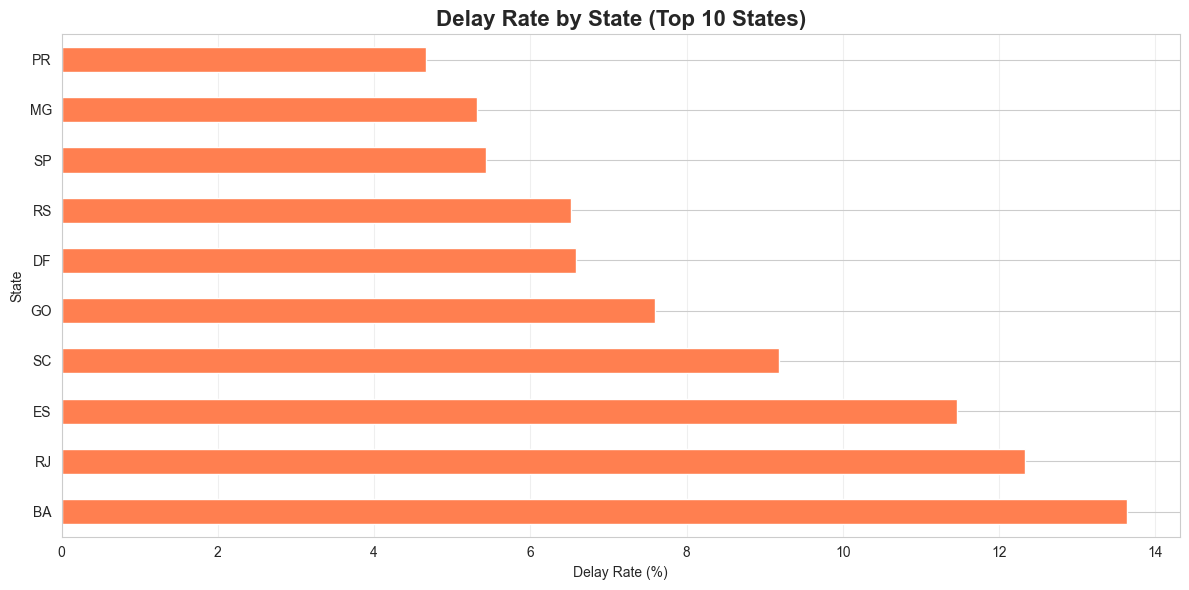


Delay Rate by State (Top 10 States):
customer_state
BA    13.633420
RJ    12.333736
ES    11.457175
SC     9.181450
GO     7.601713
DF     6.581149
RS     6.523064
SP     5.427810
MG     5.312560
PR     4.665045
Name: is_delayed, dtype: float64


In [10]:
# Delay rate by state (top 10 states)
if 'customer_state' in features_df.columns and 'is_delayed' in features_df.columns:
    top_states = features_df['customer_state'].value_counts().head(10).index
    state_delay = features_df[features_df['customer_state'].isin(top_states)].groupby('customer_state')['is_delayed'].mean().sort_values(ascending=False) * 100
    
    fig, ax = plt.subplots(figsize=(12, 6))
    state_delay.plot(kind='barh', ax=ax, color='coral')
    ax.set_title('Delay Rate by State (Top 10 States)', fontsize=16, fontweight='bold')
    ax.set_xlabel('Delay Rate (%)')
    ax.set_ylabel('State')
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../results/figures/delay_rate_by_state.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nDelay Rate by State (Top 10 States):")
    print(state_delay)

## 5. Product Category Analysis

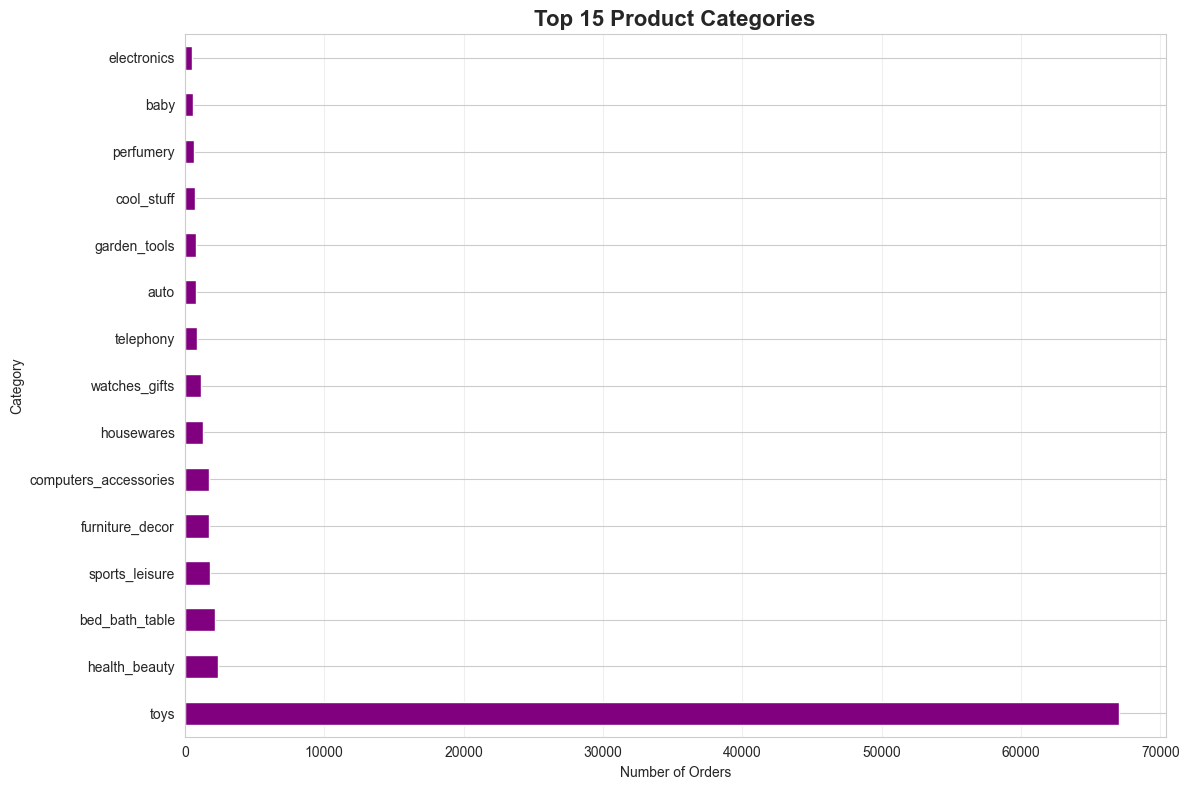

In [11]:
# Top product categories
if 'primary_category' in features_df.columns:
    category_orders = features_df['primary_category'].value_counts().head(15)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    category_orders.plot(kind='barh', ax=ax, color='purple')
    ax.set_title('Top 15 Product Categories', fontsize=16, fontweight='bold')
    ax.set_xlabel('Number of Orders')
    ax.set_ylabel('Category')
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../results/figures/top_product_categories.png', dpi=300, bbox_inches='tight')
    plt.show()

## 6. Order Value Analysis

Order Value Statistics:
count    89316.000000
mean       385.183753
std        558.492266
min          1.140000
25%        107.710000
50%        184.650000
75%        437.860000
max       6738.820000
Name: order_value, dtype: float64


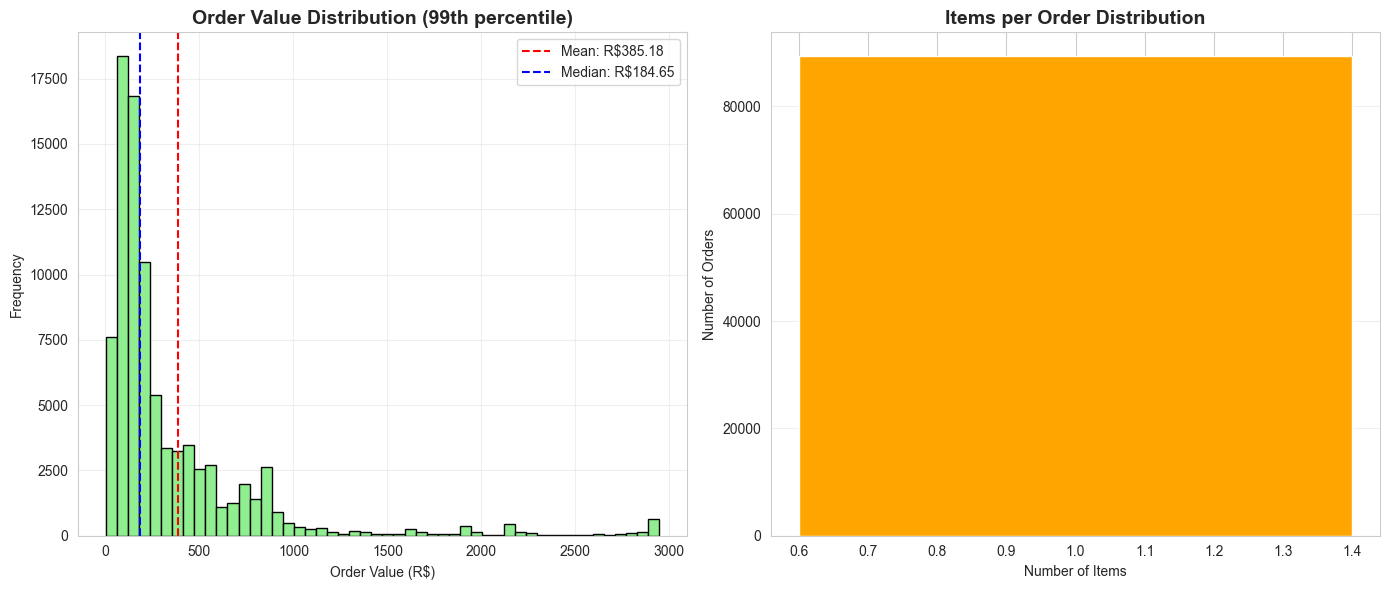

In [12]:
# Order value distribution
if 'order_value' in features_df.columns:
    value_stats = features_df['order_value'].describe()
    
    print("Order Value Statistics:")
    print(value_stats)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Histogram (excluding outliers for better visualization)
    q99 = features_df['order_value'].quantile(0.99)
    filtered_values = features_df[features_df['order_value'] <= q99]['order_value']
    
    axes[0].hist(filtered_values, bins=50, edgecolor='black', color='lightgreen')
    axes[0].set_title('Order Value Distribution (99th percentile)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Order Value (R$)')
    axes[0].set_ylabel('Frequency')
    axes[0].axvline(value_stats['mean'], color='red', linestyle='--', label=f'Mean: R${value_stats["mean"]:.2f}')
    axes[0].axvline(value_stats['50%'], color='blue', linestyle='--', label=f'Median: R${value_stats["50%"]:.2f}')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Items per order
    if 'num_items' in features_df.columns:
        item_counts = features_df['num_items'].value_counts().sort_index().head(10)
        axes[1].bar(item_counts.index, item_counts.values, color='orange')
        axes[1].set_title('Items per Order Distribution', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Number of Items')
        axes[1].set_ylabel('Number of Orders')
        axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../results/figures/order_value_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

## 7. Payment Analysis

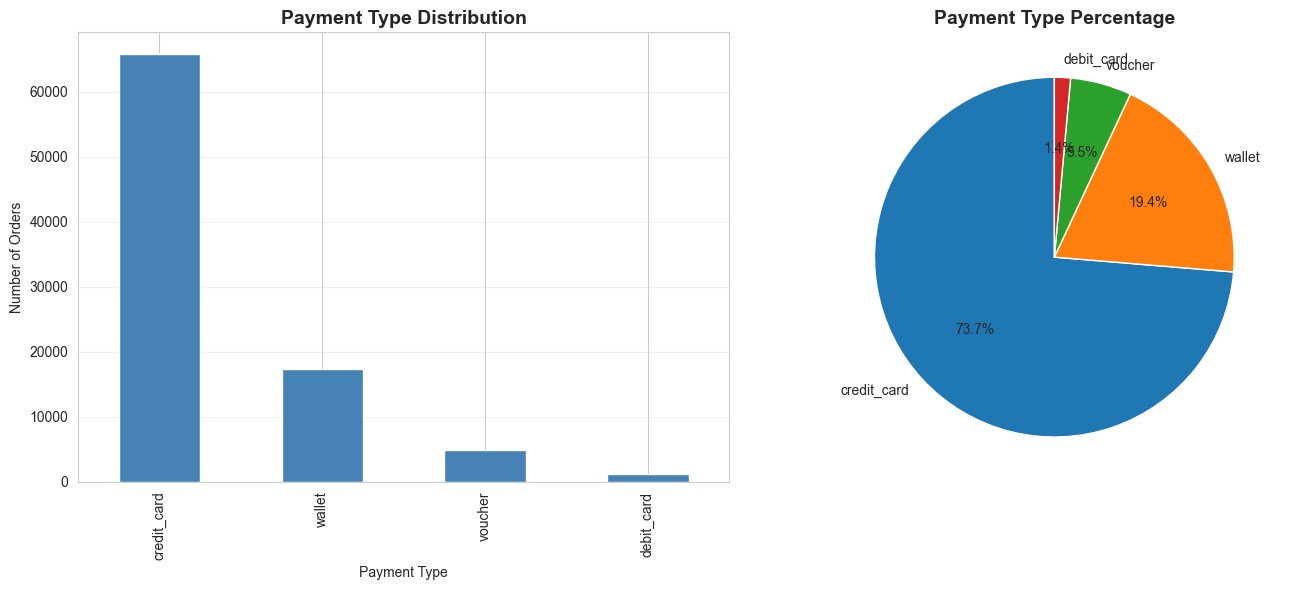


Payment Type Distribution:
primary_payment_type
credit_card    65814
wallet         17302
voucher         4911
debit_card      1289
Name: count, dtype: int64


In [13]:
# Payment type distribution
if 'primary_payment_type' in features_df.columns:
    payment_types = features_df['primary_payment_type'].value_counts()
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Bar chart
    payment_types.plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Payment Type Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Payment Type')
    axes[0].set_ylabel('Number of Orders')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Pie chart
    payment_types.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Payment Type Percentage', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.savefig('../results/figures/payment_type_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nPayment Type Distribution:")
    print(payment_types)

In [14]:
# Installment usage
if 'uses_installments' in features_df.columns:
    installment_usage = features_df['uses_installments'].value_counts()
    installment_pct = (installment_usage[1] / installment_usage.sum() * 100) if 1 in installment_usage else 0
    
    print(f"\nInstallment Usage:")
    print(f"  Orders using installments: {installment_pct:.2f}%")
    
    if 'max_installments' in features_df.columns:
        avg_installments = features_df[features_df['max_installments'] > 1]['max_installments'].mean()
        print(f"  Average installments (when used): {avg_installments:.1f}")


Installment Usage:
  Orders using installments: 50.38%
  Average installments (when used): 4.9


## 8. Customer Segmentation Analysis

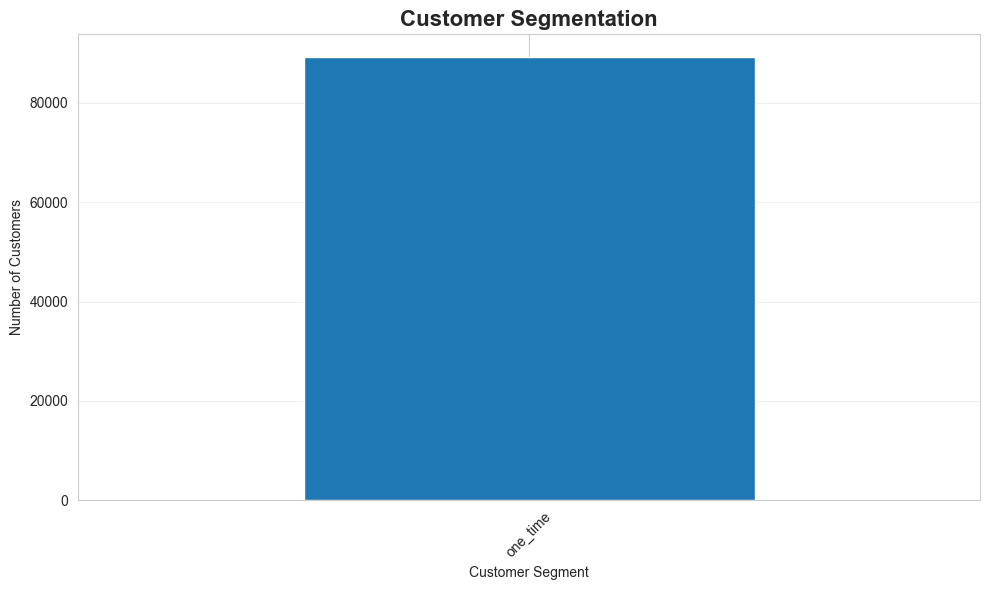


Customer Segmentation:
customer_segment
one_time    89316
Name: count, dtype: int64


In [15]:
# Customer segment distribution
if 'customer_segment' in features_df.columns:
    segment_counts = features_df.drop_duplicates('customer_id')['customer_segment'].value_counts()
    
    fig, ax = plt.subplots(figsize=(10, 6))
    segment_counts.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    ax.set_title('Customer Segmentation', fontsize=16, fontweight='bold')
    ax.set_xlabel('Customer Segment')
    ax.set_ylabel('Number of Customers')
    ax.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../results/figures/customer_segmentation.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nCustomer Segmentation:")
    print(segment_counts)

## 9. Key Business Metrics Summary

In [16]:
print("\n" + "="*60)
print("KEY BUSINESS METRICS SUMMARY")
print("="*60)

# Total orders
total_orders = len(features_df)
print(f"\nTotal Orders: {total_orders:,}")

# Unique customers
if 'customer_id' in features_df.columns:
    unique_customers = features_df['customer_id'].nunique()
    print(f"Unique Customers: {unique_customers:,}")
    print(f"Average Orders per Customer: {total_orders / unique_customers:.2f}")

# Revenue metrics
if 'order_value' in features_df.columns:
    total_revenue = features_df['order_value'].sum()
    avg_order_value = features_df['order_value'].mean()
    print(f"\nTotal Revenue: R$ {total_revenue:,.2f}")
    print(f"Average Order Value: R$ {avg_order_value:.2f}")

# Delivery metrics
if 'delivery_time_days' in features_df.columns:
    avg_delivery_time = features_df['delivery_time_days'].mean()
    median_delivery_time = features_df['delivery_time_days'].median()
    print(f"\nAverage Delivery Time: {avg_delivery_time:.1f} days")
    print(f"Median Delivery Time: {median_delivery_time:.1f} days")

if 'is_delayed' in features_df.columns:
    delay_rate = features_df['is_delayed'].mean() * 100
    print(f"Delivery Delay Rate: {delay_rate:.2f}%")

# Product metrics
if 'num_items' in features_df.columns:
    avg_items = features_df['num_items'].mean()
    print(f"\nAverage Items per Order: {avg_items:.2f}")

print("\n" + "="*60)


KEY BUSINESS METRICS SUMMARY

Total Orders: 89,316
Unique Customers: 89,316
Average Orders per Customer: 1.00

Total Revenue: R$ 34,403,072.06
Average Order Value: R$ 385.18

Average Delivery Time: 12.0 days
Median Delivery Time: 9.8 days
Delivery Delay Rate: 7.55%

Average Items per Order: 1.00



## 10. Business Recommendations

### 1. Delivery Optimization
- **Focus on high-delay states**: Allocate additional resources to states with higher delay rates
- **Improve time estimates**: Use ML model predictions to set more accurate delivery expectations
- **Weekend operations**: Consider the impact of weekend orders on delivery performance

### 2. Revenue Growth
- **Cross-sell opportunities**: Increase average items per order through recommendations
- **Target high-value segments**: Focus marketing on frequent and regular customers
- **Category expansion**: Invest in top-performing product categories

### 3. Customer Experience
- **Proactive communication**: Alert customers about potential delays before they happen
- **Flexible payment options**: Continue supporting installment payments (popular in Brazilian market)
- **Geographic expansion**: Consider warehouse locations based on order concentration

### 4. Operational Efficiency
- **Inventory management**: Stock popular categories in high-demand regions
- **Carrier partnerships**: Negotiate better terms with carriers in high-volume states
- **Peak period planning**: Prepare for seasonal variations in order volume

### 5. Data-Driven Decision Making
- **Continue monitoring**: Track KPIs regularly using the metrics established in this analysis
- **A/B testing**: Test new strategies in controlled segments before full rollout
- **Predictive analytics**: Use ML models for demand forecasting and resource planning

In [17]:
print("\nAnalysis complete! All visualizations saved to ../results/figures/")


Analysis complete! All visualizations saved to ../results/figures/
